# t-SNE visualization on Jianghan Plain groundwater dataset

A total of 1,184 groundwater samples from the middle-confined aquifer of Jianghan Plain, China were collected from 29 monitoring wells over 23 years during 1992 – 2014. Of the 21 groundwater geochemistry parameters, Yang et al. (2020) selected 11 parameters for clustering the groundwater samples into seven clusters by using HCA and delineated four hydrological zones based on the clustering results and the hydrogeology background. This dataset is used to test the effectives of t-SNE on isolating the geochemical data by plotting the data into 2D plane of t-SNE plot, i.e., if the samples are perfectly grouped into a number of clusters, the samples within a cluster are as similar as possible while the distances between the clusters should be as large as possible. The isolated samples are then used to assist desalinating the hydrogeological zones.

## Load libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
from pylab import *

In [2]:
# Dimension reduction and clustering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Global setttings
%matplotlib inline

np.random.seed(10)
np.set_printoptions(precision=4)
plt.style.use('default')

## Load data

In [4]:
# Load data
df = pd.read_csv('JianghanPlain.csv', header=0)

# Show the first 5 rows
df.head(5)

,Well,X,Y,Sampling year,Sampling season,pH,Ca,Mg,K,Na,Cl,SO4,HCO3,Fe,F,NH4
0,J1,592509.17,3397087.46,1992,dry,6.9,62.7,13.0,0.9,14.9,12.5,10,257.5,0.05,0.16,n.d.
1,J1,592509.17,3397087.46,1992,wet,7.1,68.4,14.5,0.6,13.0,13.8,22.5,277.5,0.08,0.2,n.d.
2,J1,592509.17,3397087.46,1993,dry,6.9,74.2,13.0,0.7,13.1,13.8,10,287.5,0.1,0.28,0.04
3,J1,592509.17,3397087.46,1993,wet,7.9,68.4,14.5,1.3,13.0,12.5,5,280.0,0.08,0.2,n.d.
4,J1,592509.17,3397087.46,1994,dry,7.1,66.8,13.0,0.6,12.7,13.8,7.5,272.5,0.7,0.16,n.d.


## Preprocessing

In [5]:
# Step 1 : Feature selection
pars = ['pH', 'Ca', 'Mg', 'K', 'Na', 'Cl', 'SO4', 'HCO3', 'Fe', 'F', 'NH4']
X_df = df[pars]

# Step 2 : Substitution of censored values
X_df = X_df.replace('n.d.', 0.0075)

# Step 3 : Screening the non-measurement values
X_df = X_df.replace(-9999, np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X = np.log(np.float64(X_df.values))

# Step 5 : Standardization 
rescaledX = StandardScaler().fit_transform(X)

In [6]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 1184 
Number of variables: 11


In [7]:
# Get sample ID
Y_df = pd.read_csv('JianghanPlain.csv', header=0)[['Well', 'pH', 'Ca', 'Mg', 'K', 'Na', 'Cl', 'SO4', 'HCO3', 'Fe', 'F', 'NH4']].replace('n.d.', 0.0075)

## PCA analysis

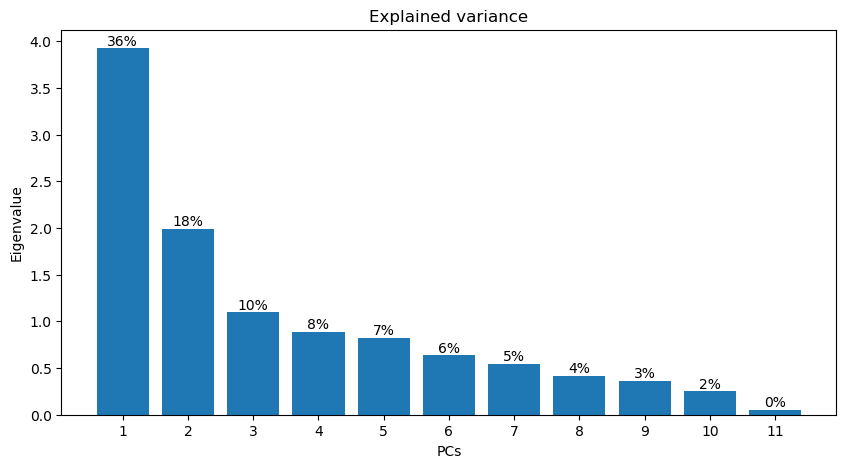

In [8]:
# Perform PCA analysis
pca = PCA(n_components=n_parameters).fit(rescaledX)

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in range(1, n_parameters + 1)], pca.explained_variance_)
# plt.axhline(y=1, color='grey', linestyle='-.')
plt.xlabel('PCs')
plt.ylabel('Eigenvalue')
plt.title('Explained variance')

# Attach explained variance ratio above each bar
for i in range(n_parameters):
    height = pca.explained_variance_[i]
    plt.annotate('{:.0f}%'.format(pca.explained_variance_ratio_[i] * 100),
                 xy=(i, height),
                 xytext=(0, 0),  
                 textcoords="offset points",
                 ha='center', va='bottom', 
                 rotation=0, fontsize=10)
    
plt.show()

## HCA analysis

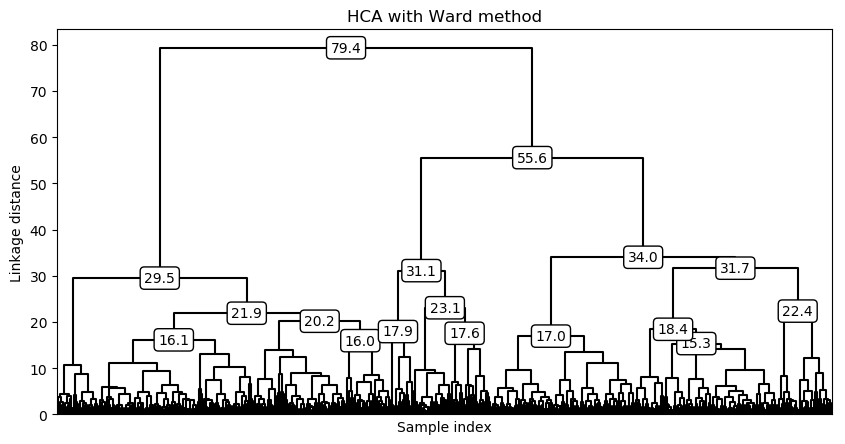

In [9]:
# Use ward method
Z = hierarchy.linkage(rescaledX, method='ward', metric='euclidean')

# Customize the colors of the clusters
colors=['black']
hierarchy.set_link_color_palette(colors)

# plot the dendrogram
plt.figure(figsize=(10, 5))
ddata = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=0, color_threshold=80)

plt.title('HCA with Ward method')
plt.xlabel('Sample index')
plt.ylabel('Linkage distance')
plt.xticks([])

# Label the linkage distance
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 15:
        # plt.plot(x, y, 'o', c='black')
        plt.text(x, y, '%.1f' %y,
                 fontsize=10,
                 ha="center", va="center",
                 bbox=dict(boxstyle="round", ec='black', fc='white'))
plt.show()

hierarchy.set_link_color_palette(None)

## Visulalizing the data

In [13]:
# Group the data into seven clusters
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
y_seven = cluster.fit_predict(rescaledX) 

# Colors for each cluster
#colors = ['#008080', 'grey', '#911eb4', '#808000', '#0082c8', '#e6194b', '#3cb44b']
colors = ['#e6194b', '#008080', '#911eb4', '#808000', '#0082c8', '#FA8072' , '#3cb44b']

### PCA visulalization

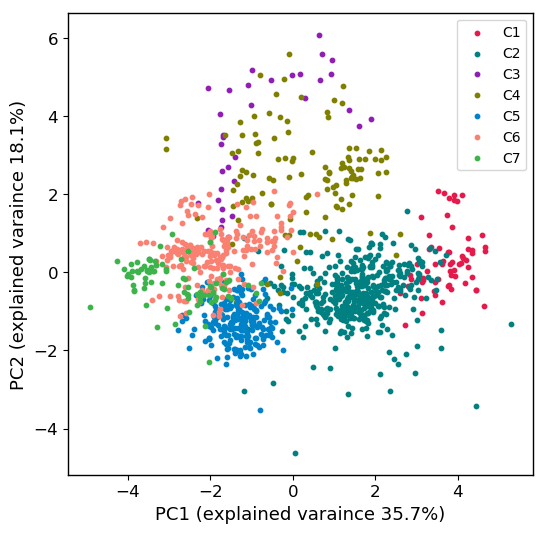

In [14]:
# PCA visulalization 
pca = PCA(n_components=11)
X_pca = pca.fit_transform(rescaledX)

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[y_seven==6, 0], X_pca[y_seven==6, 1], color=colors[0], label='C1', s=10)
plt.scatter(X_pca[y_seven==1, 0], X_pca[y_seven==1, 1], color=colors[1], label='C2', s=10)
plt.scatter(X_pca[y_seven==5, 0], X_pca[y_seven==5, 1], color=colors[2], label='C3', s=10)
plt.scatter(X_pca[y_seven==0, 0], X_pca[y_seven==0, 1], color=colors[3], label='C4', s=10)
plt.scatter(X_pca[y_seven==3, 0], X_pca[y_seven==3, 1], color=colors[4], label='C5', s=10)
plt.scatter(X_pca[y_seven==4, 0], X_pca[y_seven==4, 1], color=colors[5], label='C6', s=10)
plt.scatter(X_pca[y_seven==2, 0], X_pca[y_seven==2, 1], color=colors[6], label='C7', s=10)

plt.xlabel('PC1 (explained varaince 35.7%)', fontsize=13)
plt.ylabel('PC2 (explained varaince 18.1%)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.legend()
plt.show()

### t-SNE visulalization

In [15]:
# Project the data into two dimensions
tsne = TSNE(n_components=2, 
            init='pca', 
            random_state=0, 
            perplexity=30,
            early_exaggeration=12,
            n_iter=5000,
            method='exact',
            verbose=True)

X_tsne = tsne.fit_transform(rescaledX)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1184
[t-SNE] Computed conditional probabilities for sample 1184 / 1184
[t-SNE] Mean sigma: 0.904315
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.508522
[t-SNE] KL divergence after 5000 iterations: 0.720584


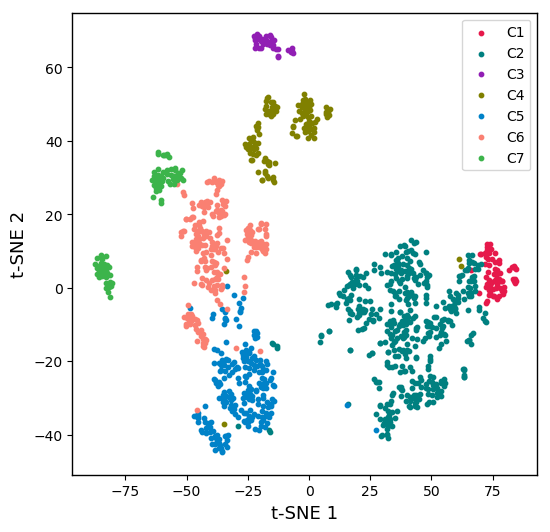

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[y_seven==6, 0], X_tsne[y_seven==6, 1], color=colors[0], label='C1', s=10)
plt.scatter(X_tsne[y_seven==1, 0], X_tsne[y_seven==1, 1], color=colors[1], label='C2', s=10)
plt.scatter(X_tsne[y_seven==5, 0], X_tsne[y_seven==5, 1], color=colors[2], label='C3', s=10)
plt.scatter(X_tsne[y_seven==0, 0], X_tsne[y_seven==0, 1], color=colors[3], label='C4', s=10)
plt.scatter(X_tsne[y_seven==3, 0], X_tsne[y_seven==3, 1], color=colors[4], label='C5', s=10)
plt.scatter(X_tsne[y_seven==4, 0], X_tsne[y_seven==4, 1], color=colors[5], label='C6', s=10)
plt.scatter(X_tsne[y_seven==2, 0], X_tsne[y_seven==2, 1], color=colors[6], label='C7', s=10)

plt.xlabel('t-SNE 1', fontsize=13)
plt.ylabel('t-SNE 2', fontsize=13)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.legend()
plt.show()


## Intergrating HCA, PCA and t-SNE

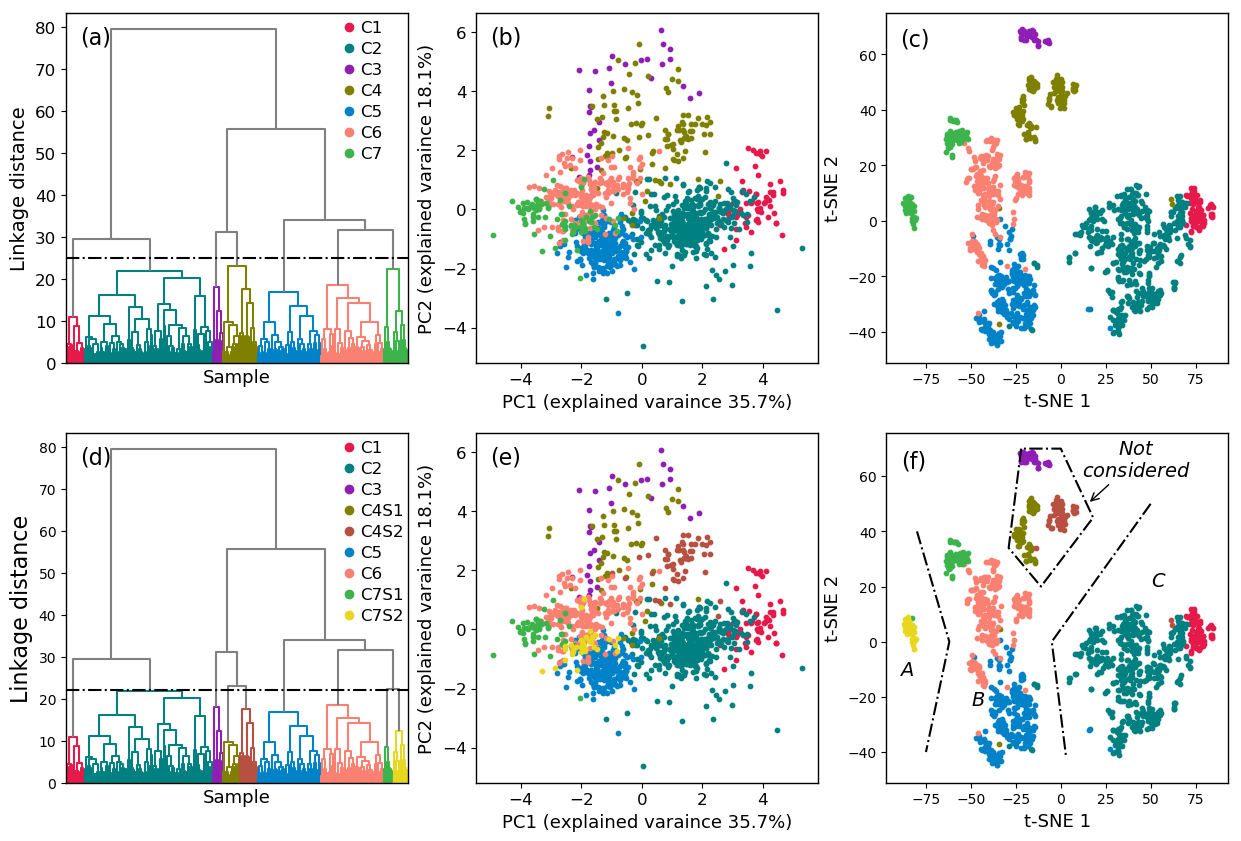

In [17]:
plt.figure(figsize=(15, 10))
##############################################################################################
# Seven clusters
#colors = ['#008080', 'grey', '#911eb4', '#808000', '#0082c8', '#e6194b', '#3cb44b']
colors = ['#e6194b', '#008080', '#911eb4', '#808000', '#0082c8', '#FA8072' , '#3cb44b']

plt.subplot(2, 3, 1)
Z = hierarchy.linkage(rescaledX, method='ward', metric='euclidean')
hierarchy.set_link_color_palette(colors)
ddata = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=0, color_threshold=25, above_threshold_color='grey')

plt.axhline(y=25, color='k', linestyle='-.')
plt.xticks([])
plt.xlabel('Sample', fontsize=13)
plt.ylabel('Linkage distance', fontsize=14)
plt.yticks(fontsize=12)

plt.scatter(9800, 80, color=colors[0]); plt.text(10200, 78.7, 'C1', fontsize=12)
plt.scatter(9800, 75, color=colors[1]); plt.text(10200, 73.7, 'C2', fontsize=12)
plt.scatter(9800, 70, color=colors[2]); plt.text(10200, 68.7, 'C3', fontsize=12)
plt.scatter(9800, 65, color=colors[3]); plt.text(10200, 63.7, 'C4', fontsize=12)
plt.scatter(9800, 60, color=colors[4]); plt.text(10200, 58.7, 'C5', fontsize=12)
plt.scatter(9800, 55, color=colors[5]); plt.text(10200, 53.7, 'C6', fontsize=12)
plt.scatter(9800, 50, color=colors[6]); plt.text(10200, 48.7, 'C7', fontsize=12)

plt.text(500, 76, '(a)', fontsize=16)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

hierarchy.set_link_color_palette(None)
###############################################################################################

plt.subplot(2, 3, 2)
pca = PCA(n_components=11)
X_pca = pca.fit_transform(rescaledX)

plt.scatter(X_pca[y_seven==6, 0], X_pca[y_seven==6, 1], color=colors[0], label='C1', s=10)
plt.scatter(X_pca[y_seven==1, 0], X_pca[y_seven==1, 1], color=colors[1], label='C2', s=10)
plt.scatter(X_pca[y_seven==5, 0], X_pca[y_seven==5, 1], color=colors[2], label='C3', s=10)
plt.scatter(X_pca[y_seven==0, 0], X_pca[y_seven==0, 1], color=colors[3], label='C4', s=10)
plt.scatter(X_pca[y_seven==3, 0], X_pca[y_seven==3, 1], color=colors[4], label='C5', s=10)
plt.scatter(X_pca[y_seven==4, 0], X_pca[y_seven==4, 1], color=colors[5], label='C6', s=10)
plt.scatter(X_pca[y_seven==2, 0], X_pca[y_seven==2, 1], color=colors[6], label='C7', s=10)

plt.xlabel('PC1 (explained varaince 35.7%)', fontsize=13)
plt.ylabel('PC2 (explained varaince 18.1%)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.text(-5, 5.6, '(b)', fontsize=16)

###############################################################################################
plt.subplot(2, 3, 3)
plt.scatter(X_tsne[y_seven==6, 0], X_tsne[y_seven==6, 1], color=colors[0], label='C1', s=10)
plt.scatter(X_tsne[y_seven==1, 0], X_tsne[y_seven==1, 1], color=colors[1], label='C2', s=10)
plt.scatter(X_tsne[y_seven==5, 0], X_tsne[y_seven==5, 1], color=colors[2], label='C3', s=10)
plt.scatter(X_tsne[y_seven==0, 0], X_tsne[y_seven==0, 1], color=colors[3], label='C4', s=10)
plt.scatter(X_tsne[y_seven==3, 0], X_tsne[y_seven==3, 1], color=colors[4], label='C5', s=10)
plt.scatter(X_tsne[y_seven==4, 0], X_tsne[y_seven==4, 1], color=colors[5], label='C6', s=10)
plt.scatter(X_tsne[y_seven==2, 0], X_tsne[y_seven==2, 1], color=colors[6], label='C7', s=10)

plt.xlabel('t-SNE 1', fontsize=13)
plt.ylabel('t-SNE 2', fontsize=13)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.text(-89, 63, '(c)', fontsize=16)

###############################################################################################
# Nine clusters
# colors = ['#008080', '#808080', '#911eb4', '#808000', 'black', '#0082c8', '#e6194b', '#3cb44b', 'yellow' ]
colors = ['#e6194b', '#008080', '#911eb4', '#808000', '#b85042', '#0082c8', '#FA8072' , '#3cb44b', '#e8d71e']


plt.subplot(2, 3, 4)
Z = hierarchy.linkage(rescaledX, method='ward', metric='euclidean')
hierarchy.set_link_color_palette(colors)
ddata = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=0, color_threshold=22, above_threshold_color='grey')

plt.axhline(y=22, color='k', linestyle='-.')
plt.xticks([])
plt.xlabel('Sample', fontsize=13)
plt.ylabel('Linkage distance', fontsize=16)

plt.scatter(9800, 80, color=colors[0]); plt.text(10200, 78.7, 'C1', fontsize=12)
plt.scatter(9800, 75, color=colors[1]); plt.text(10200, 73.7, 'C2', fontsize=12)
plt.scatter(9800, 70, color=colors[2]); plt.text(10200, 68.7, 'C3', fontsize=12)
plt.scatter(9800, 65, color=colors[3]); plt.text(10200, 63.7, 'C4S1', fontsize=12)
plt.scatter(9800, 60, color=colors[4]); plt.text(10200, 58.7, 'C4S2', fontsize=12)
plt.scatter(9800, 55, color=colors[5]); plt.text(10200, 53.7, 'C5', fontsize=12)
plt.scatter(9800, 50, color=colors[6]); plt.text(10200, 48.7, 'C6', fontsize=12)
plt.scatter(9800, 45, color=colors[7]); plt.text(10200, 43.7, 'C7S1', fontsize=12)
plt.scatter(9800, 40, color=colors[8]); plt.text(10200, 38.7, 'C7S2', fontsize=12)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.text(500, 76, '(d)', fontsize=16)

hierarchy.set_link_color_palette(None)
###############################################################################################
plt.subplot(2, 3, 5)

cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')  
y_nine = cluster.fit_predict(rescaledX) 

pca = PCA(n_components=11)
X_pca = pca.fit_transform(rescaledX)

plt.scatter(X_pca[y_nine==6, 0], X_pca[y_nine==6, 1], color=colors[0], label='C1', s=10)
plt.scatter(X_pca[y_nine==0, 0], X_pca[y_nine==0, 1], color=colors[1], label='C2', s=10)
plt.scatter(X_pca[y_nine==2, 0], X_pca[y_nine==2, 1], color=colors[2], label='C3', s=10)
plt.scatter(X_pca[y_nine==5, 0], X_pca[y_nine==5, 1], color=colors[3], label='C4S1', s=10)
plt.scatter(X_pca[y_nine==7, 0], X_pca[y_nine==7, 1], color=colors[4], label='C4S2', s=10)
plt.scatter(X_pca[y_nine==3, 0], X_pca[y_nine==3, 1], color=colors[5], label='C5', s=10)
plt.scatter(X_pca[y_nine==1, 0], X_pca[y_nine==1, 1], color=colors[6], label='C6', s=10)
plt.scatter(X_pca[y_nine==4, 0], X_pca[y_nine==4, 1], color=colors[7], label='C7S1', s=10)
plt.scatter(X_pca[y_nine==8, 0], X_pca[y_nine==8, 1], color=colors[8], label='C7S2', s=10)

plt.xlabel('PC1 (explained varaince 35.7%)', fontsize=13)
plt.ylabel('PC2 (explained varaince 18.1%)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.text(-5, 5.6, '(e)', fontsize=16)

###############################################################################################
plt.subplot(2, 3, 6)
plt.scatter(X_tsne[y_nine==6, 0], X_tsne[y_nine==6, 1], color=colors[0], label='C1', s=10)
plt.scatter(X_tsne[y_nine==0, 0], X_tsne[y_nine==0, 1], color=colors[1], label='C2', s=10)
plt.scatter(X_tsne[y_nine==2, 0], X_tsne[y_nine==2, 1], color=colors[2], label='C3', s=10)
plt.scatter(X_tsne[y_nine==5, 0], X_tsne[y_nine==5, 1], color=colors[3], label='C4S1', s=10)
plt.scatter(X_tsne[y_nine==7, 0], X_tsne[y_nine==7, 1], color=colors[4], label='C4S2', s=10)
plt.scatter(X_tsne[y_nine==3, 0], X_tsne[y_nine==3, 1], color=colors[5], label='C5', s=10)
plt.scatter(X_tsne[y_nine==1, 0], X_tsne[y_nine==1, 1], color=colors[6], label='C6', s=10)
plt.scatter(X_tsne[y_nine==4, 0], X_tsne[y_nine==4, 1], color=colors[7], label='C7S1', s=10)
plt.scatter(X_tsne[y_nine==8, 0], X_tsne[y_nine==8, 1], color=colors[8], label='C7S2', s=10)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)


plt.plot([-80, -62, -75], [40, 0, -40], 'k-.')
plt.plot([50, -5, 3], [50, 0, -42], 'k-.')

plt.plot([-22, -29, -11, 18, 0, -22], [70, 34, 20, 45, 70, 70], 'k-.')

plt.text(-90, -12, '$A$', fontsize=14)
plt.text(-50, -23, '$B$', fontsize=14)
plt.text(50, 20, '$C$', fontsize=14)

plt.annotate('$Not$' + '\n' + '$considered$',
            xy=(15, 50), xycoords='data',
            xytext=(35, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), fontsize=14, ha='center')

plt.xlabel('t-SNE 1', fontsize=13)
plt.ylabel('t-SNE 2', fontsize=13)
plt.text(-89, 63, '(f)', fontsize=16)


plt.show()


## Compare the new generated sub clusters

In [20]:
Y_df['CLU_9'] = y_nine
 
def func(pct, allvals):
    absolute = pct*1.0/100*np.sum(allvals)
    return  "%.0f" %absolute

colors = ['#66b3ff','#ff9999', '#ffcc99', '#99ff99']

### Pie plot for sub clusters C7S1 and C7S2

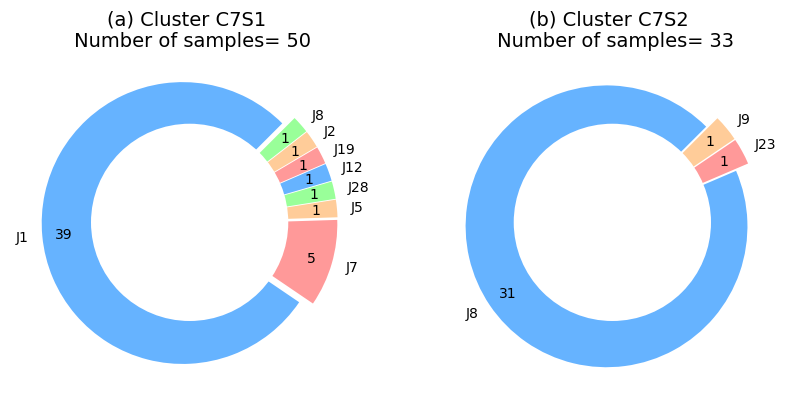

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2 , 1)
explode = (0.05, 0.05 ,0.05 , 0.05, 0.05, 0.05 ,0.05 , 0.05)
plt.pie(Y_df[Y_df['CLU_9']==4]['Well'].value_counts(), labels=Y_df[Y_df['CLU_9']==4]['Well'].value_counts().index, 
        autopct=lambda pct: func(pct, Y_df[Y_df['CLU_9']==4]['Well'].value_counts()), textprops=dict(color="k", fontsize=10),
        startangle=45, pctdistance=0.85, explode = explode, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('(a) Cluster C7S1 \n Number of samples= %d'  %Y_df[Y_df['CLU_9']==4].shape[0], fontsize=14, pad=0.0)

explode = (0.05, 0.05 ,0.05 )
plt.subplot(1, 2 , 2)
plt.pie(Y_df[Y_df['CLU_9']==8]['Well'].value_counts(), labels= Y_df[Y_df['CLU_9']==8]['Well'].value_counts().index,
        autopct=lambda pct: func(pct, Y_df[Y_df['CLU_9']==8]['Well'].value_counts()), textprops=dict(color="k", fontsize=10),
        startangle=45, pctdistance=0.85, explode = explode, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('(b) Cluster C7S2 \n Number of samples= %d'  %Y_df[Y_df['CLU_9']==8].shape[0], fontsize=14, pad=0)
plt.show()

### Pie plot for sub clusters C4S1 and C4S2

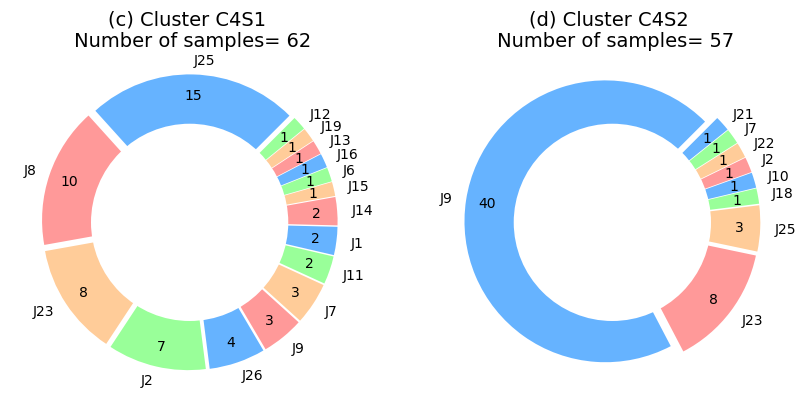

In [22]:
explode = (0.05, 0.05 ,0.05 , 0.05, 0.05, 0.05 ,0.05 , 0.05, 0.05, 0.05 ,0.05 , 0.05, 0.05, 0.05 ,0.05 , 0.05)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2 , 1)
plt.pie(Y_df[Y_df['CLU_9']==5]['Well'].value_counts(), labels=Y_df[Y_df['CLU_9']==5]['Well'].value_counts().index, 
        autopct=lambda pct: func(pct, Y_df[Y_df['CLU_9']==5]['Well'].value_counts()), textprops=dict(color="k", fontsize=10),
        startangle=45, pctdistance=0.85, explode = explode, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('(c) Cluster C4S1 \n Number of samples= %d'  %Y_df[Y_df['CLU_9']==5].shape[0], fontsize=14, pad=0)

explode = (0.05, 0.05 ,0.05 , 0.05, 0.05, 0.05 ,0.05 , 0.05, 0.05 )

plt.subplot(1, 2 , 2)
plt.pie(Y_df[Y_df['CLU_9']==7]['Well'].value_counts(), labels=Y_df[Y_df['CLU_9']==7]['Well'].value_counts().index,
       autopct=lambda pct: func(pct, Y_df[Y_df['CLU_9']==7]['Well'].value_counts()), textprops=dict(color="k", fontsize=10),
       startangle=45, pctdistance=0.85, explode = explode, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('(d) Cluster C4S2 \n Number of samples= %d'  %Y_df[Y_df['CLU_9']==7].shape[0], fontsize=14, pad=0)
plt.show()

### Box plots

In [71]:
# Style settings for the props. of the boxplot
medianprops = dict(linestyle='-', linewidth=1.25, color='k')
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')
capprops =  dict(linestyle='-', linewidth=1.25, color='k')
whiskerprops =  dict(linestyle='-.', linewidth=1.25, color='k')

#### Sub clusters C7S1 and C7S2

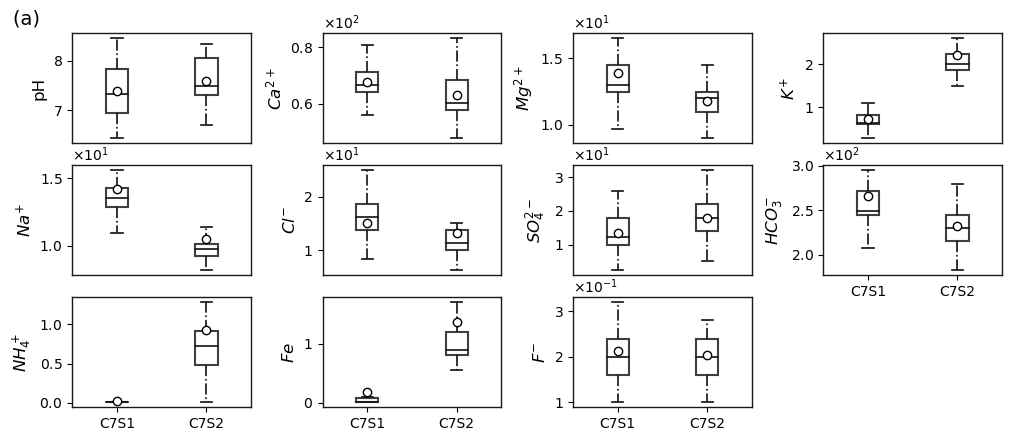

In [90]:
i = 1
plt.figure(figsize=(12,10))
for hydropar in pars:
    ax=plt.subplot(6,4,i)
    '''
    minorticks_off()
    tick_params(which='major', direction='in', length=4, width=1.25)
    tick_params(which='minor', direction='in', length=2.5, width=1.25)
    '''
    ax.spines['top'].set_linewidth(1)
    ax.spines['top'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    
    #ax.xaxis.get_major_formatter().set_powerlimits((0,2)) # 将坐标轴的base number设置为一位。
    #ax.yaxis.get_major_formatter().set_powerlimits((0,2)) # 将坐标轴的base number设置为一位。

    ax = plt.gca()  
    xfmt = ScalarFormatter(useMathText=True)
    xfmt.set_powerlimits((0, 0))  # Or whatever your limits are . . .
    gca().yaxis.set_major_formatter(xfmt)

    df_par=pd.DataFrame({'C7S1': Y_df[X_df['CLU_9']==4][hydropar],
                         'C7S2': Y_df[X_df['CLU_9']==8][hydropar]}) 
    sns.boxplot(data = df_par, width=0.25,
                capprops=capprops,
                boxprops=dict(facecolor='white'), medianprops=medianprops,
                whiskerprops=whiskerprops,
                meanprops=meanpointprops,
                meanline=False, showmeans=True,showfliers=False)
    plt.grid(False)
    
    if i in [1, 2, 3, 4, 5, 6, 7]:
        plt.xticks([])
        
    if i == 1:
        plt.ylabel('pH', fontsize=12)
    elif i == 2:
        plt.ylabel('$Ca^{2+}$', fontsize=12)
    elif i == 3:
        plt.ylabel('$Mg^{2+}$', fontsize=12)  
    elif i == 4:
        plt.ylabel('$K^{+}$', fontsize=12)
    elif i == 5:
        plt.ylabel('$Na^{+}$', fontsize=12)
    elif i == 6:
        plt.ylabel('$Cl^{-}$', fontsize=12)
    elif i == 7:
        plt.ylabel('$SO_4^{2-}$', fontsize=12)  
    elif i == 8:
        plt.ylabel('$HCO_3^{-}$', fontsize=12)
    elif i == 9:
        plt.ylabel('$NH_4^+$', fontsize=12)
    elif i == 10:
        plt.ylabel('$Fe$', fontsize=12)
    elif i == 11:
        plt.ylabel('$F^{-}$', fontsize=12)
        
    if i == 1:
        plt.title('(a)                                            ', ha='center', fontsize=14)

    i=i+1
    
    plt.subplots_adjust(wspace=0.4)
    
plt.show()

#### Subclusters C4S1 and C4S2

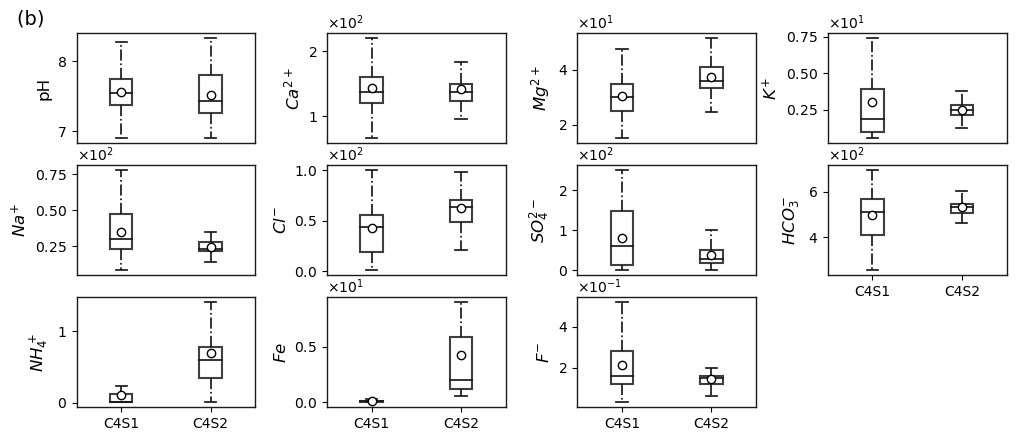

In [91]:
i = 1
plt.figure(figsize=(12,10))
for hydropar in parlist:
    ax=plt.subplot(6,4,i)
    '''
    minorticks_off()
    tick_params(which='major', direction='in', length=4, width=1.25)
    tick_params(which='minor', direction='in', length=2.5, width=1.25)
    '''

    ax.spines['top'].set_linewidth(1)
    ax.spines['top'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    
    #ax.xaxis.get_major_formatter().set_powerlimits((0,2)) # 将坐标轴的base number设置为一位。
    #ax.yaxis.get_major_formatter().set_powerlimits((0,2)) # 将坐标轴的base number设置为一位。

    ax = plt.gca()  
    xfmt = ScalarFormatter(useMathText=True)
    xfmt.set_powerlimits((0, 0))  # Or whatever your limits are . . .
    gca().yaxis.set_major_formatter(xfmt)

    df_par=pd.DataFrame({'C4S1': Y_df[Y_df['CLU_9']==5][hydropar],
                         'C4S2': Y_df[Y_df['CLU_9']==7][hydropar]}) 
    sns.boxplot(data = df_par, width=0.25,
                capprops=capprops,
                boxprops=dict(facecolor='white'), medianprops=medianprops,
                whiskerprops=whiskerprops,
                meanprops=meanpointprops,
                meanline=False, showmeans=True,showfliers=False)
    plt.grid(False)

    if i == 1:
        plt.ylabel('pH', fontsize=12)
    elif i == 2:
        plt.ylabel('$Ca^{2+}$', fontsize=12)
    elif i == 3:
        plt.ylabel('$Mg^{2+}$', fontsize=12)  
    elif i == 4:
        plt.ylabel('$K^{+}$', fontsize=12)
    elif i == 5:
        plt.ylabel('$Na^{+}$', fontsize=12)
    elif i == 6:
        plt.ylabel('$Cl^{-}$', fontsize=12)
    elif i == 7:
        plt.ylabel('$SO_4^{2-}$', fontsize=12)  
    elif i == 8:
        plt.ylabel('$HCO_3^{-}$', fontsize=12)
    elif i == 9:
        plt.ylabel('$NH_4^+$', fontsize=12)
    elif i == 10:
        plt.ylabel('$Fe$', fontsize=12)
    elif i == 11:
        plt.ylabel('$F^{-}$', fontsize=12)
        
    if i in [1, 2, 3, 4, 5, 6, 7]:
        plt.xticks([])    
    
    if i == 1:
        plt.title('(b)                                            ', ha='center', fontsize=14)
        
    i=i+1

    plt.subplots_adjust(wspace=0.4)
    
plt.show()

## Run t-SNE with different perplexity values

[=================== [Perp=1] ==================]
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1184
[t-SNE] Computed conditional probabilities for sample 1184 / 1184
[t-SNE] Mean sigma: 0.111817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.673267
[t-SNE] KL divergence after 5000 iterations: 0.493860
[=================== [Perp=5] ==================]
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1184
[t-SNE] Computed conditional probabilities for sample 1184 / 1184
[t-SNE] Mean sigma: 0.518218
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.302160
[t-SNE] KL divergence after 5000 iterations: 0.713557
[=================== [Perp=10] ==================]
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1184
[t-SNE] Computed conditional probabilities for sample 1184 / 1184
[t-SNE] Mea

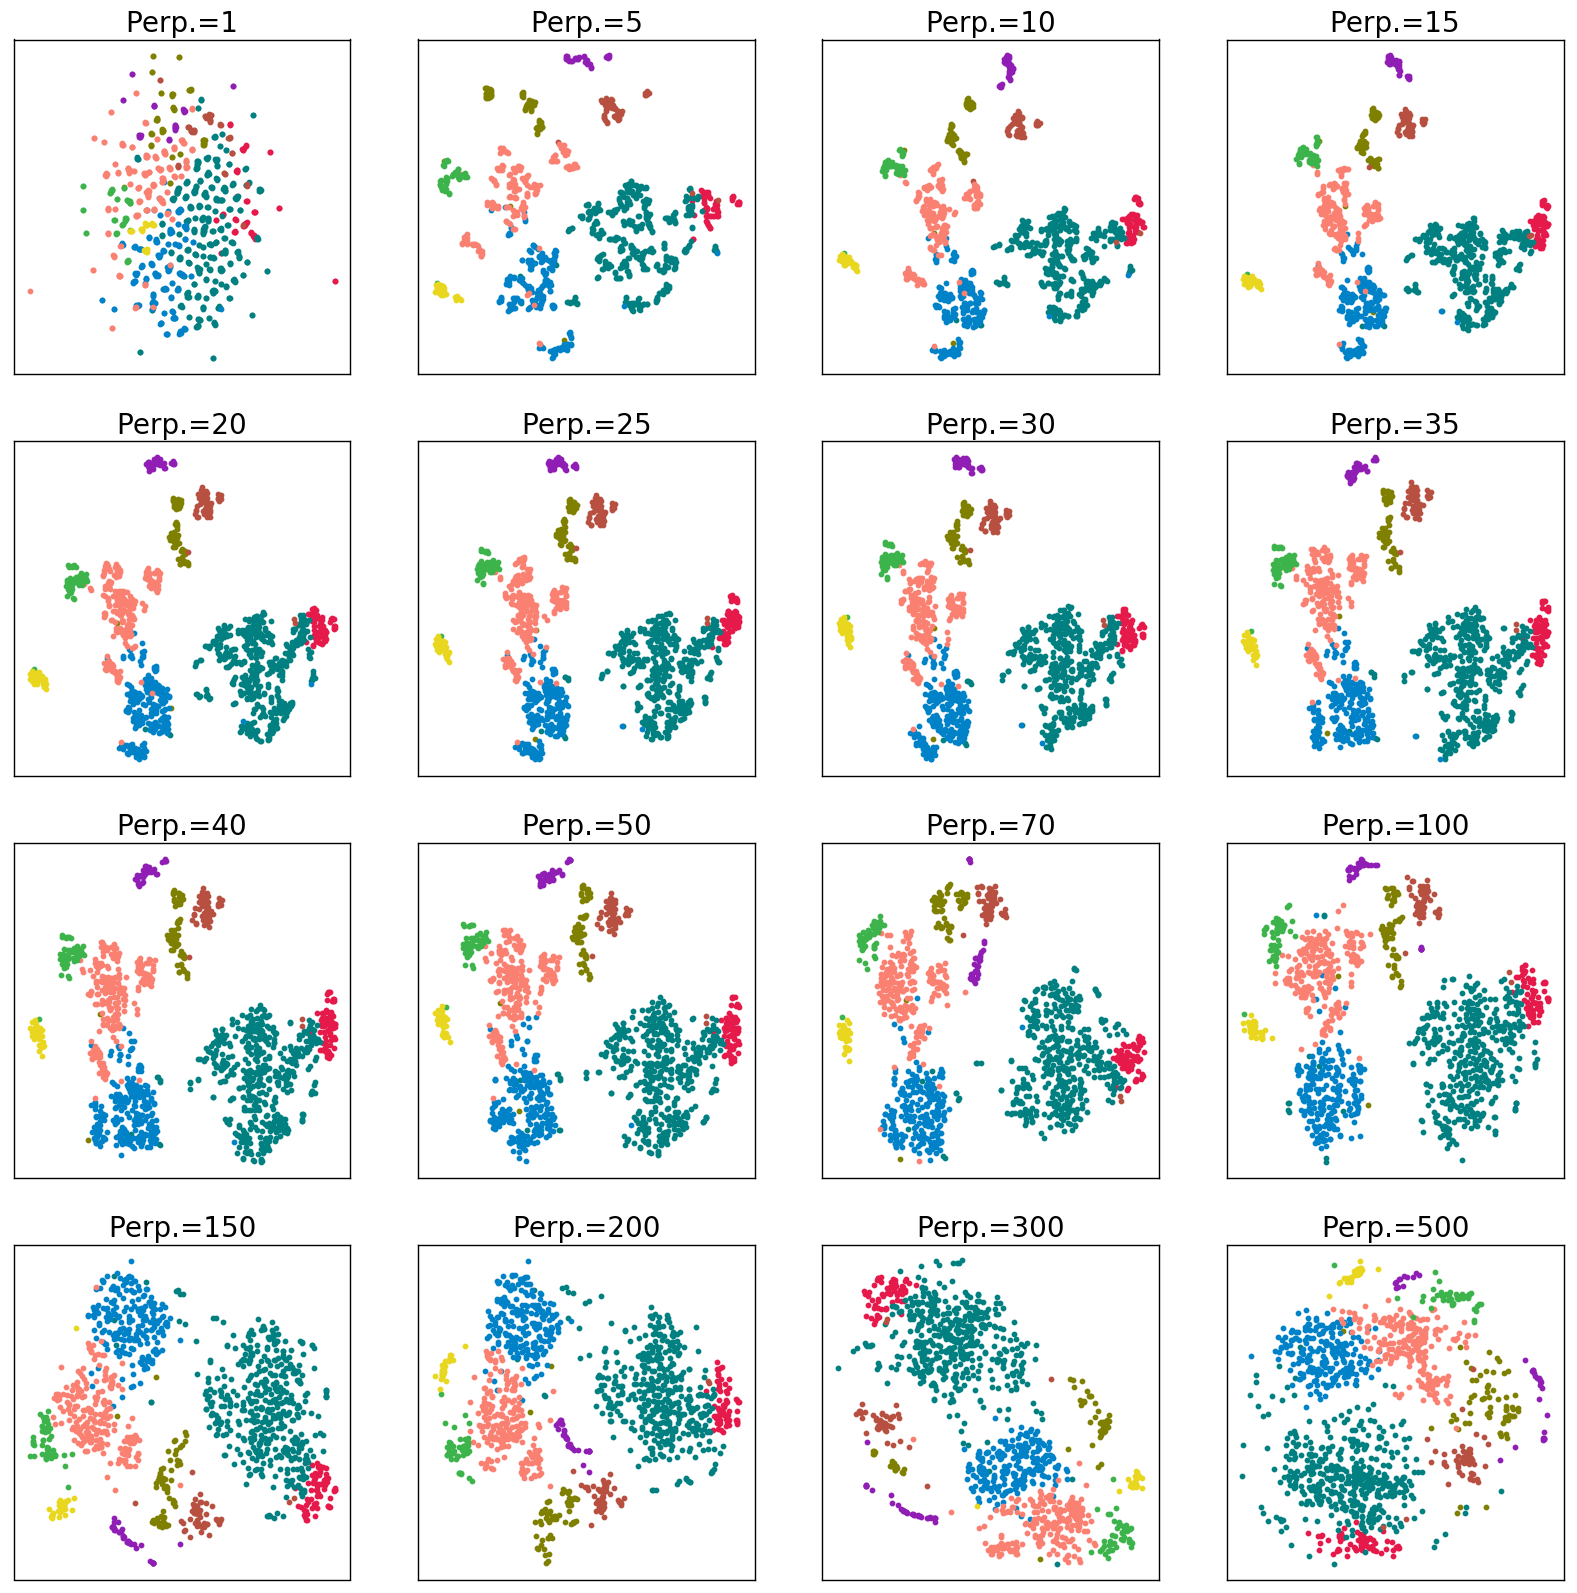

In [99]:
# Nine clusters
# colors = ['#008080', '#808080', '#911eb4', '#808000', 'black', '#0082c8', '#e6194b', '#3cb44b', 'yellow' ]
colors = ['#e6194b', '#008080', '#911eb4', '#808000', '#b85042', '#0082c8', '#FA8072' , '#3cb44b', '#e8d71e']

plt.figure(figsize=(20, 20))
i = 1
for perp in [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 70, 100, 150, 200, 300, 500]:
    
    print("[=================== [Perp=%.d] ==================]" %perp)
    tsne = TSNE(n_components=2, 
            init='pca', 
            random_state=0, 
            perplexity=perp,
            early_exaggeration=12,
            n_iter=5000,
            metric='euclidean',
            method='exact',
            verbose=True)

    X_tsne = tsne.fit_transform(rescaledX)
    
    plt.subplot(4, 4, i)
    plt.scatter(X_tsne[y_nine==6, 0], X_tsne[y_nine==6, 1], color=colors[0], label='C1', s=10)
    plt.scatter(X_tsne[y_nine==0, 0], X_tsne[y_nine==0, 1], color=colors[1], label='C2', s=10)
    plt.scatter(X_tsne[y_nine==2, 0], X_tsne[y_nine==2, 1], color=colors[2], label='C3', s=10)
    plt.scatter(X_tsne[y_nine==5, 0], X_tsne[y_nine==5, 1], color=colors[3], label='C4S1', s=10)
    plt.scatter(X_tsne[y_nine==7, 0], X_tsne[y_nine==7, 1], color=colors[4], label='C4S2', s=10)
    plt.scatter(X_tsne[y_nine==3, 0], X_tsne[y_nine==3, 1], color=colors[5], label='C5', s=10)
    plt.scatter(X_tsne[y_nine==1, 0], X_tsne[y_nine==1, 1], color=colors[6], label='C6', s=10)
    plt.scatter(X_tsne[y_nine==4, 0], X_tsne[y_nine==4, 1], color=colors[7], label='C7S1', s=10)
    plt.scatter(X_tsne[y_nine==8, 0], X_tsne[y_nine==8, 1], color=colors[8], label='C7S2', s=10)
    
    plt.title('Perp.=%d' %perp, fontsize=20)
    plt.xticks([])
    plt.yticks([])
    
    ax = plt.gca()
    '''
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    '''
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    
    i = i + 1
    
plt.show()